In [20]:
# Predicting house prices using a feed forward model

import pandas as pd
import csv
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('housepricedata.csv') #creates a data frame that reads the downloaded data 

Saving housepricedata.csv to housepricedata (2).csv


In [21]:
df # This plots the input data as the first 10 columns of the table. The output data, "Above Median Price", is the feature we would like to predict.

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [23]:
dataset = df.values

In [27]:
dataset # We are converting our dataframe into an array by calling the values. 
# We now split our dataset into input features (X) and the feature we wish to predict (Y). 
# To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y.

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [29]:
X = dataset[:,0:10] #All of the rows and the first 10 columns are now used for the input data of our NN.
print(X)

[[ 8450     7     5 ...     8     0   548]
 [ 9600     6     8 ...     6     1   460]
 [11250     7     5 ...     6     1   608]
 ...
 [ 9042     7     9 ...     9     2   252]
 [ 9717     5     6 ...     5     0   240]
 [ 9937     5     6 ...     6     0   276]]


In [30]:
Y = dataset[:,10] #All the rows in the 10th column. This is the label of what we want to predict.
print(Y)

[1 1 1 ... 1 0 0]


In [31]:
# Next we should normalize the data since each of the columns have differing scales of values. If we don't standardize the data, it will be hard to 
# initialize the neural network once we start creating the layers. More so, our NN might prioritize the datat with higher values than others, not relaying
# an accurate representation of our predictions.

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() # This scales the data so that all the input features are collapsed between [0,1]
X_scale = min_max_scaler.fit_transform(X)

In [32]:
min_max_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
X_scale # As you can see, all the values among the input dataset is within [0,1], as compared to X in the cell above

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [35]:
from sklearn.model_selection import train_test_split # Now we split the data into training and validation data

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3) 

#The test size implies about 30% of the data is reserved for testing
# The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest.
# Unfortunately, this function only helps us split our dataset into two. 
# Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test

In [38]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
# The code above will split the val_and_test size equally to the validation set and the test set.

In [36]:
"""In summary, we now have a total of six variables for our datasets we will use:

X_train (10 input features, 70% of full dataset)
X_val (10 input features, 15% of full dataset)
X_test (10 input features, 15% of full dataset)
Y_train (1 label, 70% of full dataset)
Y_val (1 label, 15% of full dataset)
Y_test (1 label, 15% of full dataset)"""

'In summary, we now have a total of six variables for our datasets we will use:\n\nX_train (10 input features, 70% of full dataset)\nX_val (10 input features, 15% of full dataset)\nX_test (10 input features, 15% of full dataset)\nY_train (1 label, 70% of full dataset)\nY_val (1 label, 15% of full dataset)\nY_test (1 label, 15% of full dataset)'

In [39]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [50]:
# Now it is time to design our model. We set up the architecture by calling Sequential and simply describing the layers of the network in sequence

from keras.models import Sequential
from keras.layers import Dense

#Seeds help the algorithm randomly choose the same set of values each time we run the code. This allows for repeatability. This code doesn't use seeds, so 
#there will be variations in the results each time the code is ran
model = Sequential([ 
#This says that we will store our model in the variable ‘model’, and we’ll describe it sequentially (layer by layer) in between the square brackets.
    Dense(32, activation='relu', input_shape=(10,)), 
#We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features. 
#Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.these are dense layers with linear activation functions
    Dense(32, activation='relu'),
#Our second layer is also a dense layer with 32 neurons, ReLU activation. 
#Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.    
    Dense(1, activation='sigmoid'),
#Our third layer is a dense layer with 1 neuron, sigmoid activation.
])

In [42]:
model.compile(optimizer='sgd', #stochastic gradient descent. This is an optimizer to ensure the algorithm converges to a global minimum
              loss='binary_crossentropy', #The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
              metrics=['accuracy']) #Next we can track our accuracy alongside our loss function

In [43]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))
#The function is called ‘fit’ as we are fitting the parameters to the data. 
#We have to specify what data we are training on, which is X_train and Y_train. 
#Then, we specify the size of our mini-batch and how long we want to train it for (epochs). 
#Lastly, we specify what our validation data is so that the model will tell us how we are doing on the validation data at each point. 
#This function will output a history, which we save under the variable hist. We’ll use this variable a little later when we get to visualization.

Epoch 1/100
32/32 [==============================] - 14s 17ms/step - loss: 0.6961 - accuracy: 0.4895 - val_loss: 0.6917 - val_accuracy: 0.5890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5588 - val_loss: 0.6848 - val_accuracy: 0.5616
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5735 - val_loss: 0.6792 - val_accuracy: 0.5434
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5644 - val_loss: 0.6743 - val_accuracy: 0.5434
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5717 - val_loss: 0.6698 - val_accuracy: 0.5662
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5869 - val_loss: 0.6653 - val_accuracy: 0.5982
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6231 - val_loss: 0.6608 - val_accuracy: 0.6164
Epoch 8/100

In [44]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8356


0.835616409778595

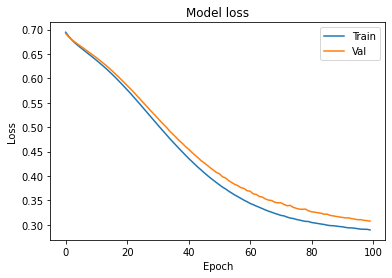

In [47]:
# Visualizing Loss & Accuracy
# Plot the training loss and the validation loss over the number of epochs passed. To display some nice graphs, we will use the package matplotlib.

import matplotlib.pyplot as plt

#Visualize the training loss and the validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

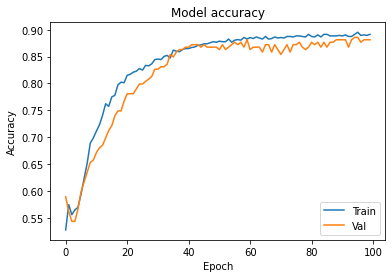

In [53]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [54]:
# Adding Regularization to Neural Network
# Create a model to represent overfitting. Then use this model to showcase methods to mitigate it.
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [55]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [56]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 43ms/step - loss: 0.5706 - accuracy: 0.6477 - val_loss: 0.4220 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3559 - accuracy: 0.8544 - val_loss: 0.4190 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3066 - accuracy: 0.8621 - val_loss: 0.3513 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2945 - accuracy: 0.8861 - val_loss: 0.3387 - val_accuracy: 0.8447
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2551 - accuracy: 0.8971 - val_loss: 0.2879 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2809 - accuracy: 0.8920 - val_loss: 0.2690 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2450 - accuracy: 0.9047 - val_loss: 0.2607 - val_accuracy: 0.8904
Epoch 

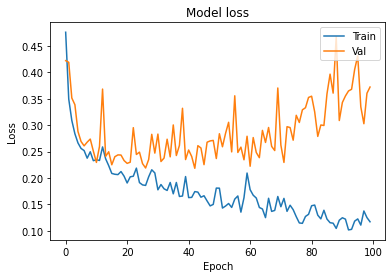

In [57]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#This graph is a clear indication that overfitting has occurred in our model. 
# The training loss is decreasing, but the validation loss is way above the training loss and increasing

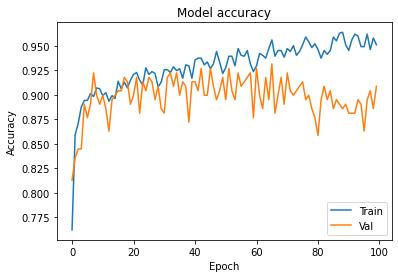

In [58]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [59]:
# To mitigate overfitting, let us try regularization and dropout techniques.
# L2 Regularization will be first

from keras.layers import Dropout
from keras import regularizers

# Create a new model to incorporate regularization in

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)), 
# kernel_regularizer tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.
    Dropout(0.3),
# This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training.
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [60]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 58ms/step - loss: 21.1280 - accuracy: 0.5142 - val_loss: 3.8988 - val_accuracy: 0.7260
Epoch 2/100
32/32 [==============================] - 1s 44ms/step - loss: 2.4726 - accuracy: 0.8185 - val_loss: 0.6654 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 44ms/step - loss: 0.5807 - accuracy: 0.8798 - val_loss: 0.6210 - val_accuracy: 0.8174
Epoch 4/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5221 - accuracy: 0.8848 - val_loss: 0.4968 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4998 - accuracy: 0.8511 - val_loss: 0.5173 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4978 - accuracy: 0.8601 - val_loss: 0.5510 - val_accuracy: 0.8311
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5069 - accuracy: 0.8659 - val_loss: 0.5888 - val_accuracy: 0.8356
Epoch

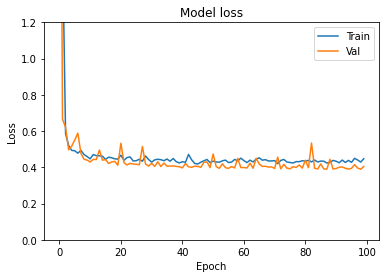

In [65]:
# Plot the loss of the graph
# The validation loss much more closely matches our training loss.
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

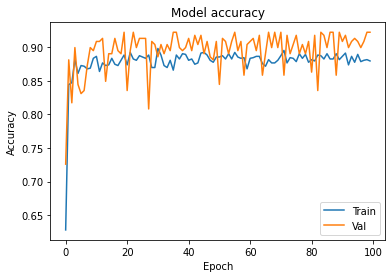

In [64]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# The overfitting has been noticeably reduced since the previous graph